
# Mini Reto 005 del grupo Python para Trading

# Indicadores - Cruce de medias moviles simples (SMA)

El objetivo de este mini reto es utilizar el indicador de SMA (Simple Moving Average) o media móvil simple, para hacer una estrategía simple de trading, con la que obtener señales de compra y venta.

El objetivo de este reto es:

- Conocer el indicador SMA y saber aplicarlo a los precios de una acción.
- Aplicar dos medias, rapida y lenta, para identificar los cruces.
- Detectar los cruces para generar señaes de compra y venta.

Para ello, partiendo del código que hay a continuación, se pide realizar los siguientes pasos:

1) Calcular en la columna `slow_SMA` y `fast_SMA` los valores correspondientes respecto a la columna `Close`

2) Detectar los cruces creando una columna `long_signal` y otra `short_signal` que valgan True cuando se produzca el cruce de medias y False el resto de los períodos.

3) Pintar en una gráfica el precio `Close` las medias rapidas y lentas `slow_SMA` `fast_SMA` y las señales de compra `long_signal` y venta `short_signal` en forma de triangulo, tal y como se indica en la siguiente imagen de resultado.

![Resultado](../Resultado.png)


### Partir de el siguiente código

In [1]:
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import yfinance as yf

In [2]:
fast_SMA = 9
slow_SMA = 30
aapl = yf.download('AAPL', '2020-1-1','2020-10-25')

[*********************100%***********************]  1 of 1 completed


# Solución propuesta

In [3]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.909500,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.573036,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.848030,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.436470,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,74.086395,108872000


#### Calculamos los valores solicitados

Lo primero que vamos a hacer es calcular los valores para cada periodo de las medias rapida y lenta. Luego vamos a calcular la diferencia, de forma que en cada periodo, sepamos si una media movil esta sobre la otra, solo viendo si la diferencia entre ambas positiva o negativa.

In [4]:
aapl['fast_SMA'] = ta.SMA(aapl.Close,fast_SMA)
aapl['slow_SMA'] = ta.SMA(aapl.Close,slow_SMA)
aapl['diff_SMA'] = aapl.fast_SMA - aapl.slow_SMA
aapl

,Open,High,Low,Close,Adj Close,Volume,fast_SMA,slow_SMA,diff_SMA
Date,,,,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.909500,100805600,NaN,NaN,NaN
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.573036,135480400,NaN,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.848030,146322800,NaN,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.436470,118387200,NaN,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,74.086395,108872000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-10-19,119.959999,120.419998,115.660004,115.980003,115.980003,120639300,118.824445,114.636666,4.187779
2020-10-20,116.199997,118.980003,115.629997,117.510002,117.510002,124423700,119.094445,114.793000,4.301445
2020-10-21,116.669998,118.709999,116.449997,116.870003,116.870003,89946000,119.305556,114.778000,4.527557


#### Calculamos las señales

Para calcular las señales de Compra y Venta, vamos a verificar que si la diferencia del periodo anterior es menor de 0 y la actual es mayor o igual, se trata de un cruce de la rapida sobre la lenta y esto produce una señal de compra `long_signal`

In [5]:
aapl['long_signal']  = (aapl.diff_SMA.shift(1) < 0) & (aapl.diff_SMA >= 0)
aapl['short_signal'] = (aapl.diff_SMA.shift(1) > 0) & (aapl.diff_SMA <= 0)
aapl.long_signal.sort_values(ascending=False)

Date
2020-04-15     True
2020-10-12     True
2020-10-23    False
2020-04-02    False
2020-04-17    False
              ...  
2020-07-14    False
2020-07-13    False
2020-07-10    False
2020-07-09    False
2019-12-31    False
Name: long_signal, Length: 207, dtype: bool

Tras ordenar los valores, se observa que tan solo hay 2 señales de compra. Vamos a ver las de venta:

In [6]:
aapl.short_signal.sort_values(ascending=False)

Date
2020-09-15     True
2020-02-25     True
2020-04-20    False
2020-04-17    False
2020-04-16    False
              ...  
2020-07-14    False
2020-07-13    False
2020-07-10    False
2020-07-09    False
2019-12-31    False
Name: short_signal, Length: 207, dtype: bool

#### Generar la gráfica con todos los datos

Ahora vamos a pintar tanto las lineas de precios, como de las medias moviles rapida y lenta, y los indicadores de compra y venta en los cruces de medias que procedan:

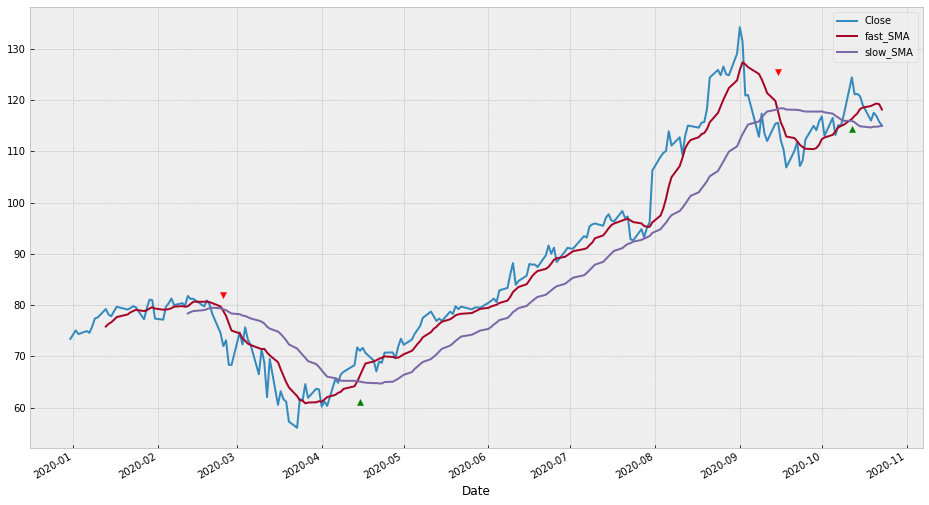

In [7]:
aapl[['Close','fast_SMA','slow_SMA']].plot(figsize=(16,9))

plt.scatter(aapl[aapl.long_signal == True].index,
         aapl.Close[aapl.long_signal == True]-10,
         marker='^', color='green', label='Buy')

plt.scatter(aapl[aapl.short_signal == True].index,
         aapl.Close[aapl.short_signal == True]+10,
         marker='v', color='red', label='Sell')